<a href="https://colab.research.google.com/github/vignesh03-M/Restaurant-Website/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-8dc05782c5e7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.fillna(x_train.median(),inplace=True)
<ipython-input-1-8dc05782c5e7>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.median(),inplace=True)


R2 Score: 0.7892772760233792
Mean Squared Error: 1925297627.3639116
Mean Absolute Error: 26169.00178123959


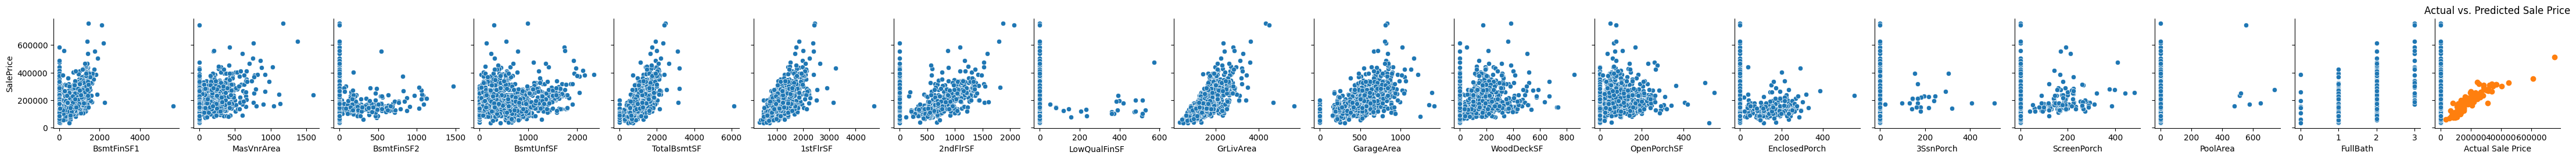

<ipython-input-1-8dc05782c5e7>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(X_test.median(),inplace=True)


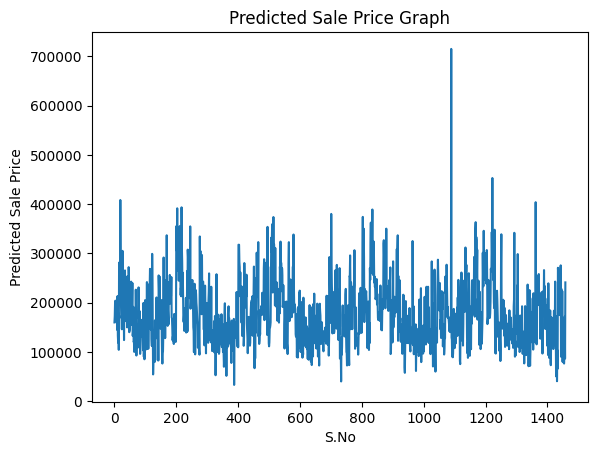

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plot
import seaborn as sns


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

test.head()

pp = sns.pairplot(data=train,
                  x_vars=['BsmtFinSF1','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','FullBath','BedroomAbvGr'],
                  y_vars=['SalePrice'])

features = ['BsmtFinSF1','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','FullBath','BedroomAbvGr']
target = 'SalePrice'

x_train = train[features]
y_train = train[target]

x_train.fillna(x_train.median(),inplace=True)

x_train, x_test,y_train, y_test = train_test_split(x_train,y_train,test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

y_pred

print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

X_test = test[features]
X_test.fillna(X_test.median(),inplace=True)
test_pred = model.predict(X_test)


plot.scatter(y_test, y_pred)
plot.xlabel('Actual Sale Price')
plot.ylabel('Predicted Sale Price')
plot.title('Actual vs. Predicted Sale Price')
plot.show()

X_test = test[features]
X_test.fillna(X_test.median(),inplace=True)

test_pred = model.predict(X_test)

plot.plot(test_pred)
plot.xlabel('S.No')
plot.ylabel('Predicted Sale Price')
plot.title('Predicted Sale Price Graph')
plot.show()
